# Importation of packages

In [40]:
%pip install -r ../requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
import numpy as np
import umap
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

'''
Variables: 
---------

corpus : list of documents
embeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) 
red_emd : reduced embeddings matrix using dimentionality reduction
k : number of clusters
labels : documents labels
pred : list of clustering predicted clusters 

'''

'\nVariables: \n---------\n\ncorpus : list of documents\nembeddings : documents embeddings of size NxM (N : number of documents, M : embedding dimension) \nred_emd : reduced embeddings matrix using dimentionality reduction\nk : number of clusters\nlabels : documents labels\npred : list of clustering predicted clusters \n\n'

## UMAP 

In [42]:
def dim_red(mat, p):
    '''
    Perform dimensionality reduction using umap

    Input:
    -----
        mat : NxM list 
        p : number of dimensions to keep 
    Output:
    ------
        red_mat : NxP list such that p<<m
    '''
    # perform dimensionality reduction using umap
    reducer = umap.UMAP(n_components=p)
    red_mat = reducer.fit_transform(mat)
    
    # red_mat = mat[:,:p]
    
    return red_mat

# Kmeans

In [43]:
def clust(mat, k):
    '''
    Perform clustering

    Input:
    -----
        mat : input list 
        k : number of cluster
    Output:
    ------
        pred : list of predicted labels
    '''
    # perform clustering using kmeans
    kmeans = KMeans(n_clusters=k, random_state=0).fit(mat)
    pred = kmeans.labels_
       
    # pred = np.random.randint(k, size=len(corpus))
    
    return pred

# Import data

In [52]:
# import data
ng20 = fetch_20newsgroups(subset='test')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

In [44]:
# embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

In [51]:
# save embeddings
np.save('embeddings.npy', embeddings)

In [45]:
# print(embeddings.shape)
embeddings.shape

(2000, 384)

In [46]:
type(embeddings)

numpy.ndarray

In [47]:
# print embeddings as dataframe
import pandas as pd
df = pd.DataFrame(embeddings)
df.head()


,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.577400,-0.030358,-0.102261,0.060326,-0.015291,-0.234031,-0.346943,0.129524,-0.003832,-0.042432,...,-0.016920,-0.277231,-0.273009,-0.107147,-0.102845,-0.023753,-0.072382,-0.375602,-0.091590,-0.056659
1,-0.547650,-0.147162,-0.109380,-0.169172,0.111827,-0.252576,0.060074,-0.150678,-0.054314,0.073151,...,0.217950,-0.093913,0.157129,0.028333,0.142177,0.352915,-0.091395,-0.188222,-0.072291,-0.150164
2,0.006459,0.161897,-0.224144,0.158056,-0.078980,-0.370586,0.030617,-0.232604,0.238777,-0.035669,...,-0.108683,0.079843,0.105473,-0.153740,-0.381738,-0.089754,0.632199,-0.384035,0.304872,0.175816
3,-0.177904,0.350405,-0.460294,-0.148764,0.055244,0.153033,0.253875,-0.034833,0.219968,0.076479,...,0.183497,0.022842,0.558684,-0.195775,-0.249930,0.223309,0.260235,-0.248233,-0.016308,-0.008697
4,-0.104774,0.072117,-0.288240,-0.295858,-0.028443,0.050851,-0.149128,-0.252626,0.285305,0.427897,...,-0.128132,-0.155115,0.284549,0.264601,-0.247014,0.120581,-0.068725,-0.274165,-0.008575,-0.276296


In [48]:
set(labels)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

# Test & evaluation

In [49]:
# perform dimentionality reduction
red_emb = dim_red(embeddings, 20)

# perform clustering
pred = clust(red_emb, k)

# evaluate clustering results
nmi_score = normalized_mutual_info_score(pred,labels)
ari_score = adjusted_rand_score(pred,labels)

print(f'NMI: {nmi_score:.2f} \nARI: {ari_score:.2f}')


NMI: 0.47 
ARI: 0.29


c:\Users\MLDS\Desktop\M2 MLSD\Data_engineering\exam\projetDataEng\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


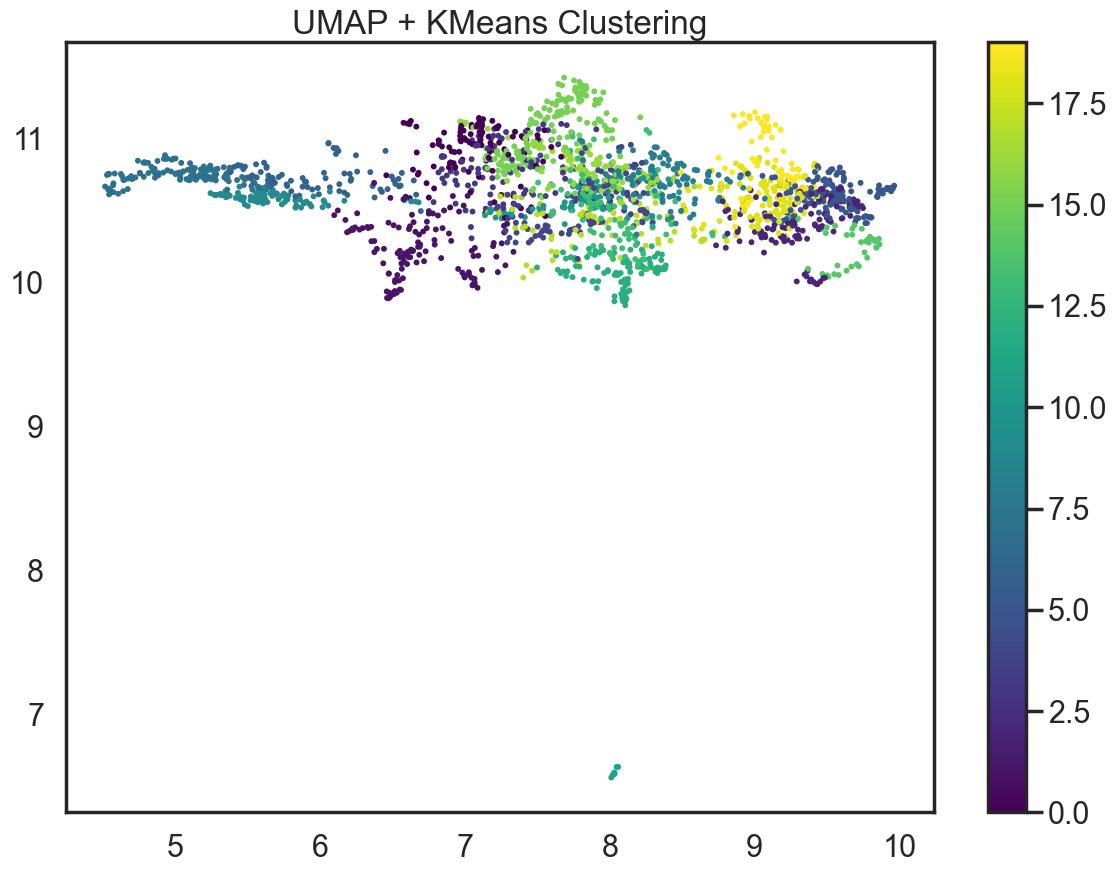

In [50]:
# visualize clustering results
plt.scatter(red_emb[:, 0], red_emb[:, 1], c=pred, cmap='viridis', s=5)
plt.colorbar()
plt.title('UMAP + KMeans Clustering')
plt.show()